# Assignment 4: Implement RandomSearchCV with k fold cross validation on KNN

Name: Devendra Bharti<br>
Email: kumardev0614@gmail.com

In [1]:
from sklearn.datasets import make_classification                 # To generate Dataset.
from sklearn.model_selection import train_test_split             # To split Dataset into D_train and D_test.


# Generating Required Dataset to apply K-NN and K-fold cross validation.
x,y = make_classification(n_samples=10000,n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [2]:
import numpy as np             # To do so many things can't say now.

### 1. Function to generate 10 unique values in range "param_range".

In [3]:
import random

def calc_params(*args):
    hyper_para = {}
    a = args[0][0]
    b = args[0][1]
    l = sorted(random.sample(range(a,b), 10))
    
    params = []
    for i in l:
        if int(i)%2==0:
            params.append(int(i)+1)
        else:
            params.append(int(i))
    hyper_para["n_neighbors"] = params
    return hyper_para

### Just Cheking Shape of Train Data.

In [4]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (7500, 2)
y_train (7500,)


In [5]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (2500, 2)
y_test (2500,)


### Function for 
2: Devide data into groups<br>
3: Perform Cross-Validation for each value of k, upto number of folds for each k.<br>
4: And then return both "Validation_scores" and "Train_scores"

In [6]:
def RandomSearchCV(X_train, Y_train, classifier, param_range, folds):
    
    params = calc_params(param_range)          # Calculating K values for given parameter range "param_range"
    
    x_groups = np.array_split(X_train, folds)  # splitting whole data into groups = folds. here folds = 3 ==> g1, g2, g3
    y_groups = np.array_split(Y_train, folds)  # same for Y_train values.
    
    Validation_scores = []                     # We will save mean of validation accuracy values we got in each fold for each K
    Train_scores = []                          # Same for mean of train accuracy values.

    for k in tqdm(params["n_neighbors"]):
        Valid_acc = []                         # To append validation acc in each fold. It will become empty for every next K.
        Train_acc = []                         # To append train acc in each fold.
        
        # suffuling groups for random CV and random Train groups.
        for f in range(folds):
            x_cv = x_groups.pop(0)  # poping out (0th item) g1 as x_cv from list of all groups. Only g2 and g3 remain in list.
            y_cv = y_groups.pop(0)  # same for Y_train dataset group.
    
            x_train = x_groups[0]   # now g2 become 0th element of list. Stroring it in x_train to join it with reamining groups
            y_train = y_groups[0]   # same for Y_groups.
            for i in range(1, folds - 1):
                x_train = np.concatenate((x_train, x_groups[i]))  # We already got g2 in x_train. So now joining g3 with x_train
                y_train = np.concatenate((y_train, y_groups[i]))  # now x_train = g2+g3. If we have more groups in list.
                                                                  # This for loop would have joined those groups in x_train too.
    
            classifier.n_neighbors = k                            # setting n_neighbors = k 
            classifier.fit(x_train, y_train)                      # applying KNN on g2+g3. It will change in next fold. g1+g3
            
            y_cv_predicted = classifier.predict(x_cv)               # predicting y' values for CV group.
            Valid_acc.append(accuracy_score(y_cv, y_cv_predicted))  # comparing y' with original y values of CV.

            y_train_predicted = classifier.predict(x_train)         # predicting y' values for train group.
            Train_acc.append(accuracy_score(y_train, y_train_predicted))  # comparing y' with original y values of train group.
            
            x_groups.append(x_cv)    # appending popped CV into list of groups again for next fold. list = [g2, g3, g1]
            y_groups.append(y_cv)
        
        # outer loop, which is running for k values from params
        Validation_scores.append(np.mean(np.array(Valid_acc)))   # mean of Valid_acc from each fold for each k value.
        Train_scores.append(np.mean(np.array(Train_acc)))        # mean of Train_acc from each fold for each k value.
        
    return Validation_scores, Train_scores, params

### Initalizing Input values, Calling RandomSearchCV function, Plotting Hyper-parameter VS accuracy plot.

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


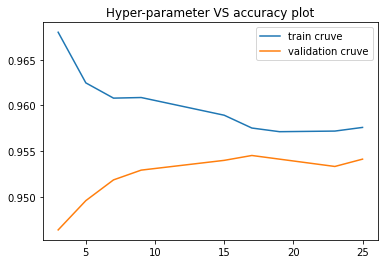

In [14]:
import matplotlib.pyplot as plt                              # To plot: Hyper-parameter VS accuracy plot
from sklearn.neighbors import KNeighborsClassifier           # To apply K-NN on Dataset.
from sklearn.metrics import accuracy_score                   # To calculate accuracy score while Cross-Validation
from tqdm import tqdm                                        # To show progress bar in Cross-Validation 

knn_clf = KNeighborsClassifier()
param_range = (1,25)
folds = 3

Validation_scores, Train_scores, params = RandomSearchCV(X_train, y_train, knn_clf, param_range, folds)

#params = calc_params(param_range)
plt.plot(params['n_neighbors'],Train_scores, label='train cruve')
plt.plot(params['n_neighbors'],Validation_scores, label='validation cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

### Choosing Best Hyper Parameter.
From above plot we can see, at k=17 both curves are nearest(approx) to each other and then linear for k>17.<br>
So we can say k = 17 is a good parameter for given Dataset.

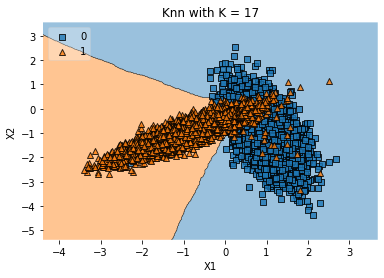

In [16]:
from mlxtend.plotting import plot_decision_regions                 # To plot: Decision surface/region plot.

knn_clf.n_neighbors = 17              # setting best K value as n_neighbors for K-nn classifier object.
knn_clf.fit(X_train, y_train)         # fitting D_train for k = 17.

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=knn_clf, legend=2)

# Adding axes annotations
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Knn with K = 17')
plt.show()

Learning So much from your course.<br>
This Assignment was fun to do.<br>
Thanks.....